## Question 1: Is there a correlation between good performance in one module and another?

## (20 Marks)

## Hint: Perform suitable technique to deal with missing values. There are multiple ways to deal with missing values, provide reasonable explanation for the technique used. Pick a group of students and determine if there is a correlation between the results of two modules of your choice. How did the correlation compare across students from different academic groups?

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Appropriate packages were imported.

In [2]:
df = pd.read_csv('student-grades_0524.csv')

CSV file was read and assigned to the variable 'df'.

In [3]:
df.head()

,Student ID,Academic Group,CLASS,Chem.CA,Chem.TEST1,Chem.TEST2,Chem.TEST3,Chem.SemMark,Chem.SemGrade,Physics.CA1,...,Writing.ASG2,Writing.CA1,Writing.CA2,Writing.SemMark,Writing.SemGrade,Prog.CA1,Prog.CA2,Prog.ASG1,Prog.SemMark,Prog.Sem Grade
0,1,GrpD,E,84,95,100,100,93,A+,83.2,...,75.5,86.0,70.0,78.0,B+,99.2,96.7,85.0,93.0,A+
1,2,GrpD,E,85,80,98,63,82,A,85.2,...,77.5,88.0,80.0,80.0,A,96.0,80.0,90.0,89.0,A+
2,3,GrpD,E,91,55,78,83,80,A,83.6,...,76.0,95.0,75.0,80.0,A,99.2,86.3,84.0,89.0,A+
3,4,GrpD,E,83,95,80,70,82,A,86.6,...,74.0,79.0,70.0,75.0,B+,92.5,84.7,72.0,82.0,A
4,5,GrpD,E,81,93,98,80,87,A+,80.5,...,73.0,100.0,85.0,78.0,B+,98.3,61.7,82.0,81.0,A


The first 5 rows of a DataFrame were displayed as part of the data exploration.

In [4]:
df.columns

Index(['Student ID', 'Academic Group', 'CLASS', 'Chem.CA', 'Chem.TEST1',
       'Chem.TEST2', 'Chem.TEST3', 'Chem.SemMark', 'Chem.SemGrade',
       'Physics.CA1', 'Physics.CA2', 'Physics.ASG1', 'Physics.SemMark',
       'Physics.SemGrade', 'Writing.ASG1', 'Writing.ASG2', 'Writing.CA1',
       'Writing.CA2', 'Writing.SemMark', 'Writing.SemGrade', 'Prog.CA1',
       'Prog.CA2', 'Prog.ASG1', 'Prog.SemMark', 'Prog.Sem Grade'],
      dtype='object')

In [5]:
lst = df.columns.tolist()

In [6]:
for i in lst:
    print(f'{i}: {df[i].isnull().sum()}')

Student ID: 0
Academic Group: 0
CLASS: 0
Chem.CA: 0
Chem.TEST1: 0
Chem.TEST2: 0
Chem.TEST3: 0
Chem.SemMark: 0
Chem.SemGrade: 0
Physics.CA1: 2
Physics.CA2: 2
Physics.ASG1: 2
Physics.SemMark: 2
Physics.SemGrade: 2
Writing.ASG1: 3
Writing.ASG2: 3
Writing.CA1: 3
Writing.CA2: 3
Writing.SemMark: 3
Writing.SemGrade: 3
Prog.CA1: 3
Prog.CA2: 3
Prog.ASG1: 3
Prog.SemMark: 3
Prog.Sem Grade: 3


Columns retrieved from the dataframe were converted to a list and assigned to a variable to check for null value for each column.

In [7]:
impute = df['Physics.SemMark'].median()

df['Physics.SemMark'] = df['Physics.SemMark'].fillna(impute)

In [8]:
# imputed before question 3 as variable assigned to boolean masking as the variables in the below cell are used 

impute = df['Prog.SemMark'].median()

df['Prog.SemMark'] = df['Prog.SemMark'].fillna(impute)

Missing scores are imputed with median.

In [9]:
df_A = df[df['Academic Group'] == 'GrpA']
df_B = df[df['Academic Group'] == 'GrpB']
df_C = df[df['Academic Group'] == 'GrpC']
df_D = df[df['Academic Group'] == 'GrpD']
df_E = df[df['Academic Group'] == 'GrpE']

Boonlean masking performed to assign each group to its respective variable.

In [10]:
df_A['Chem.SemMark'].cov(df_A['Physics.SemMark'])/ (df_A['Chem.SemMark'].std() * df_A['Physics.SemMark'].std())


0.5217554302402666

There is a strong postive correlation for Group A between the two chosen modules.


In [11]:
df_B['Chem.SemMark'].cov(df_B['Physics.SemMark'])/ (df_B['Chem.SemMark'].std() * df_B['Physics.SemMark'].std())

0.5402808033429849

There is a strong postive correlation for Group B between the two chosen modules.


In [12]:
df_C['Chem.SemMark'].cov(df_C['Physics.SemMark'])/ (df_C['Chem.SemMark'].std() * df_C['Physics.SemMark'].std())

0.4972712939148708

There is postive correlation with moderate strength for Group C.

In [13]:
df_D['Chem.SemMark'].cov(df_D['Physics.SemMark'])/ (df_D['Chem.SemMark'].std() * df_D['Physics.SemMark'].std())

0.3873396671486028

There is postive correlation with moderate strength for Group D.

In [14]:
df_E['Chem.SemMark'].cov(df_E['Physics.SemMark'])/ (df_E['Chem.SemMark'].std() * df_E['Physics.SemMark'].std())

0.34187790997372336

There is postive correlation with moderate strength for Group E.

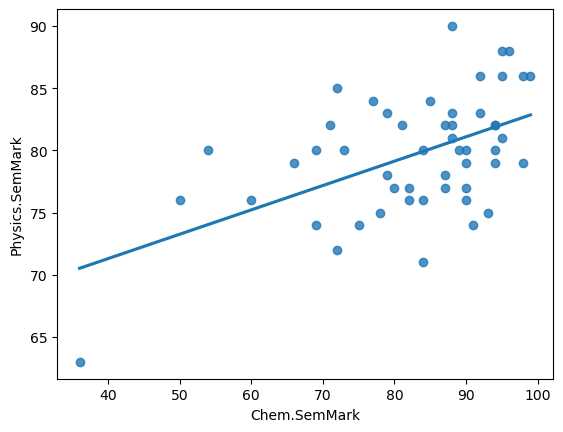

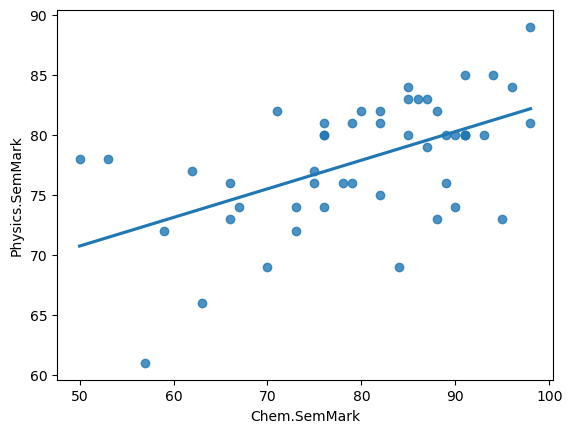

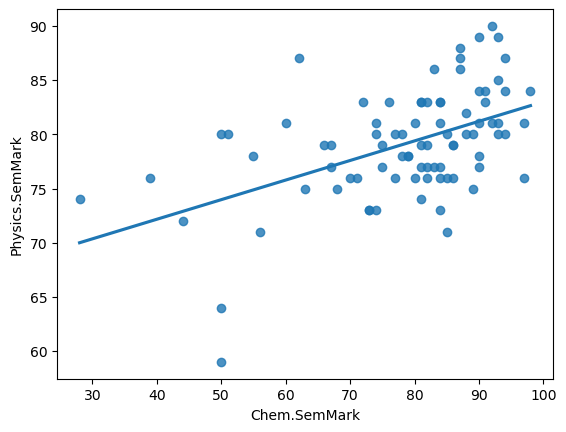

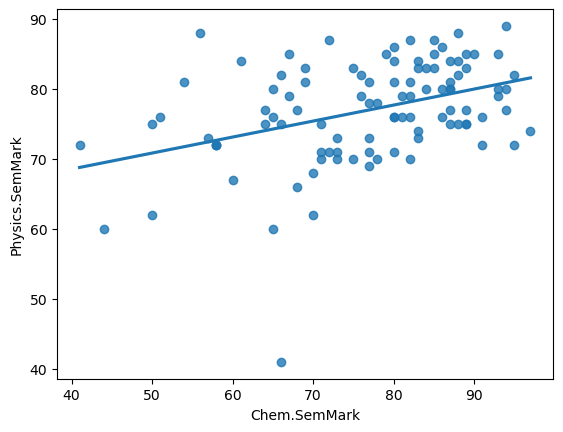

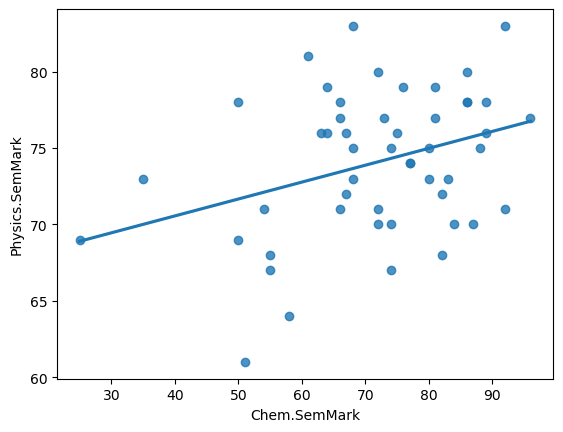

In [15]:
for df_plot in [df_A, df_B, df_C, df_D, df_E]:
    sns.regplot( x = df_plot['Chem.SemMark'], y= df_plot['Physics.SemMark'], ci=None)
    plt.show()

Based on the scatter-plot, there is a positive correlation between Chem.SemMark and Physics.SemMark for all Groups.

## Question 2: Is the distribution of marks similar across academic groups? Is there a particular academic group that fared better?

## (15 Marks)

## Hint: Pick one module to compare across different academic groups. Comment on the central tendency and dispersion, and distribution across different groups taking the same module.

Population mean is 82.82 and variance 170.19


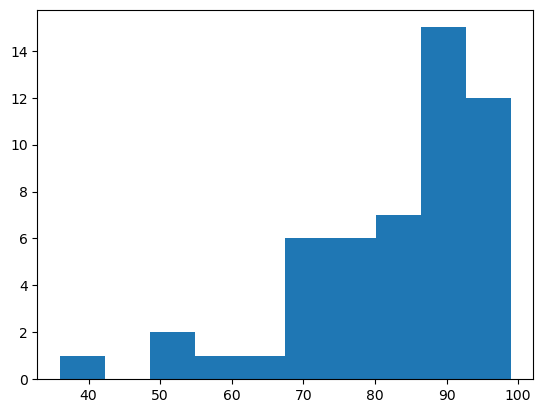

Population mean is 79.94 and variance 143.27


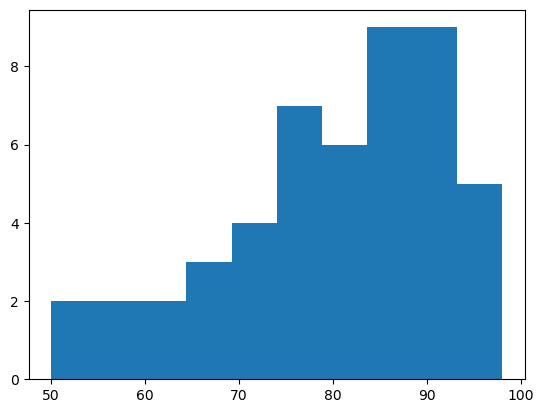

Population mean is 78.62 and variance 198.19


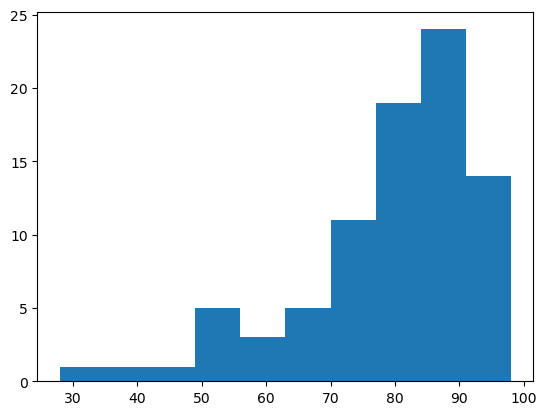

Population mean is 76.92 and variance 153.95


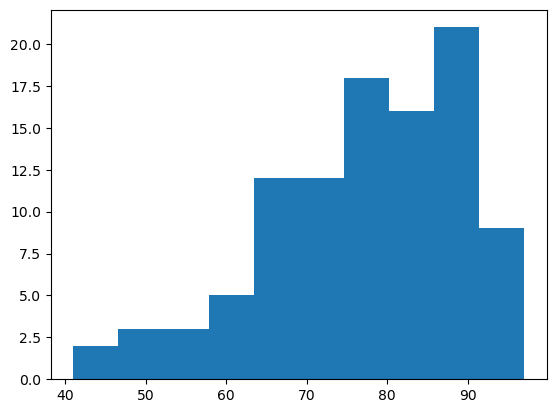

Population mean is 71.62 and variance 213.87


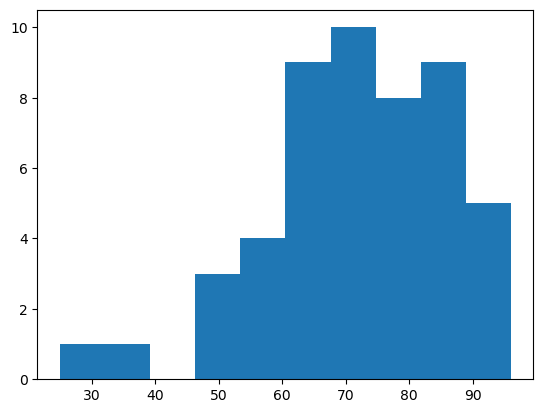

In [16]:
for df_plot in [df_A, df_B, df_C, df_D, df_E]:
    plt.title 
    plt.hist(df_plot['Chem.SemMark'])
    print(f"Population mean is {df_plot['Chem.SemMark'].mean():.2f} and variance {df_plot['Chem.SemMark'].var():.2f}")
    plt.show()


Based on the visualisation, Group A has the highest mean score as compapared to the other groups for Chemistry. However, Group B has the lowest variance which indicates a more consistent score. All groups have a negatively skewed distribution which means that most of the score are on the higher spectrum. 

## Question 3: Students from GrpA consistently perform better. Is that a fair statement? Use hypothesis testing to prove or disprove this statement.
## (15 Marks)
## Hint: Set a suitable significance level and use an appropriate hypothesis test to compare GrpA students results to the rest of the students.

# Group A vs Group B
<br>
$ H_0: {\mu_A - \mu_B = 0}$ 
<br>
$ H_1:{\mu_A - \mu_B > 0} $
<br>
  

# Group A vs Group C

<br>
$ H_0: {\mu_A - \mu_C = 0}$ 
<br>
$ H_1:{\mu_A - \mu_C > 0} $
<br>
  

# Group A vs Group D

<br>
$ H_0: {\mu_A - \mu_D = 0}$ 
<br>
$ H_1:{\mu_A - \mu_D >0} $
<br>
  

# Group A vs Group E

<br>
$ H_0: {\mu_A - \mu_E = 0}$ 
<br>
$ H_1:{\mu_A - \mu_E > 0} $
<br>
  

### Specify one-tail or two-tail test
- Carry out a one tail test 
### Level of significance and Critical value
<br>

- Level of significance: $\alpha = 0.05$
- This means that there is 5% chance that we will reject a null hypothesis wrongly (Type 1 error or false positive)
- To put it in another way, there is a 5% chance that we will label Group A as better when it actually not

## Critical value for a t-test between Group A and B

In [17]:
df_A.shape

(51, 25)

In [18]:
df_B.shape

(49, 25)

In [19]:
sig_level = 0.05

# Critical value
from scipy import stats
critical_value = stats.t.ppf(1-0.05, 98) # df = 51+49-2
print(critical_value)

1.6605512170440568


## Critical value for a t-test between Group A and C

In [20]:
df_C.shape

(84, 25)

In [21]:
sig_level = 0.05

# Critical value
from scipy import stats
critical_value = stats.t.ppf(1-0.05, 133) # df = 51+84-2
print(critical_value)

1.6563912444045108


## Critical value for a t-test between between Group A and D

In [22]:
df_D.shape

(101, 25)

In [23]:
sig_level = 0.05

# Critical value
from scipy import stats
critical_value = stats.t.ppf(1-0.05, 150) # df = 51+101-2
print(critical_value)

1.6550755001846063


## Critical value for a t-test between between Group A and E

In [24]:
df_E.shape

(50, 25)

In [25]:
sig_level = 0.05

# Critical value
from scipy import stats
critical_value = stats.t.ppf(1-0.05, 99) # df = 51+50-2
print(critical_value)

1.6603911559963895


## t-value and p-value for a t-test between between Group A and B

In [26]:
t_stat1, p_value1 = stats.ttest_ind(df_A['Prog.SemMark'], df_B['Prog.SemMark'])
print(f"t-stat: {t_stat1}")
print(f"p-value: {p_value1}")

t-stat: 2.437926698542473
p-value: 0.016573281498708285


## t-value and p-value for a t-test between between Group A and C

In [27]:
t_stat2, p_value2 = stats.ttest_ind(df_A['Prog.SemMark'], df_C['Prog.SemMark'])
print(f"t-stat: {t_stat2}")
print(f"p-value: {p_value2}")

t-stat: 2.044518754372388
p-value: 0.04287533639984689


## t-value and p-value for a t-test between between Group A and D

In [28]:
t_stat3, p_value3 = stats.ttest_ind(df_A['Prog.SemMark'], df_D['Prog.SemMark'])
print(f"t-stat: {t_stat3}")
print(f"p-value: {p_value3}")

t-stat: 3.2217268829740786
p-value: 0.0015628972902885048


## t-value and p-value for a t-test between between Group A and E

In [29]:
t_stat4, p_value4 = stats.ttest_ind(df_A['Prog.SemMark'], df_E['Prog.SemMark'])
print(f"t-stat: {t_stat4}")
print(f"p-value: {p_value4}")

t-stat: 4.412767156767782
p-value: 2.6021647948309133e-05


## t-test result between between Group A and B

In [30]:
if p_value1 < sig_level:
    print("Reject null hypothesis, Students from Group A consistently perform better than Group B.")
else:
    print("Accept null hypothesis, that there is no difference in performance between Group A and Group B.")

Reject null hypothesis, Students from Group A consistently perform better than Group B.


## t-test result between between Group A and C

In [31]:
if p_value2 < sig_level:
    print("Reject null hypothesis, Students from Group A consistently perform better than Group C.")
else:
    print("Accept null hypothesis, that there is no difference in performance between Group A and Group C.")

Reject null hypothesis, Students from Group A consistently perform better than Group C.


## t-test result between between Group A and D

In [32]:
if p_value3 < sig_level:
    print("Reject null hypothesis, Students from Group A consistently perform better than Group D.")
else:
    print("Accept null hypothesis, that there is no difference in performance between Group A and Group D.")

Reject null hypothesis, Students from Group A consistently perform better than Group D.


## t-test result between between Group A and E

In [33]:
if p_value4 < sig_level:
    print("Reject null hypothesis, Students from Group A consistently perform better than Group E.")
else:
    print("Accept null hypothesis, that there is no difference in performance between Group A and Group E.")

Reject null hypothesis, Students from Group A consistently perform better than Group E.


## Question 4: Is the distribution of grades independent of the academic groups?
## (15 Marks)
## Hint: Use a suitable chi-square test to examine if grade distribution is indeed independent of the academic groups the student is in.

<br>
$ H_0: \text{The distribution of grades is independent of the academic groups}$
<br>
$ H_1: \text{The distribution of grades is dependent of the academic groups} $


In [34]:
xtab = pd.crosstab(df['Academic Group'], df['Prog.Sem Grade'])
print(xtab)

Prog.Sem Grade   A  A+  AD   B  B+  C  C+  D  D+  F
Academic Group                                     
GrpA             8  19   7   6   4  0   4  2   0  1
GrpB             7  13   2  11   4  0   6  3   0  2
GrpC            13  24   4   8  14  1   8  2   6  2
GrpD            16  27   3   8  15  9   7  2   5  9
GrpE             5   9   1   4   8  7   5  3   3  5


Contigency table was generated to prepare the comparision of grades of each group using chi-square test.

In [35]:
sig_level = 0.01

Level of significance was set at 0.01.

In [36]:
from scipy import stats
# Call the chisquare test and pass in the appropriate parameters.
# Note: If degrees of freedom is 1, Yates' correction is applied by default. We manually set it to False. 
# code here: 

from scipy import stats
chi2, pval, dof, expected_obs = stats.chi2_contingency(xtab, correction = False) 
# If degrees of freedom is 1, apply Yates' correction
# for continuity applied by default. We manually set it to False.
 
print(f"chisq stat: {chi2} \np-value: {pval} \nDegrees of freedom: {dof} \nExpected_counts:\n {expected_obs}")

chisq stat: 59.65474325596071 
p-value: 0.007879155497535352 
Degrees of freedom: 36 
Expected_counts:
 [[ 7.52710843 14.13253012  2.61144578  5.68373494  6.9126506   2.61144578
   4.60843373  1.84337349  2.15060241  2.9186747 ]
 [ 7.08433735 13.30120482  2.45783133  5.34939759  6.5060241   2.45783133
   4.3373494   1.73493976  2.02409639  2.74698795]
 [12.10240964 22.72289157  4.19879518  9.13855422 11.11445783  4.19879518
   7.40963855  2.96385542  3.45783133  4.69277108]
 [14.90662651 27.98795181  5.17168675 11.2560241  13.68975904  5.17168675
   9.12650602  3.65060241  4.25903614  5.78012048]
 [ 7.37951807 13.85542169  2.56024096  5.57228916  6.77710843  2.56024096
   4.51807229  1.80722892  2.10843373  2.86144578]]


## Chi-square Result

In [37]:
if pval < sig_level:
    print("Reject null hypothesis. The distribution of grades is independent of the academic groups.")
else: 
    print("Accept null hypothesis. The distribution of grades is dependent of the academic groups.")

Reject null hypothesis. The distribution of grades is independent of the academic groups.


## Question 5: What is the breakdown of each component to the final SemMark? For example, CA, Test 1, Test 2 and Test 3 contribute 40%, 20%, 20% and 20% respectively to the final semester mark for Chem (Chem.SemMark).
## (15 Marks)

## Hint: Pick one module and using linear regression, find the contribution of each component toward the final Semester mark. Explain using the statsmodel summary table to support your findings.

In [38]:
import statsmodels.api as sm

X4 = df[['Chem.CA', 'Chem.TEST1', 'Chem.TEST2', 'Chem.TEST3']].values

# Add a column to the data, for statsmodels to do matrix multiplication.
X4 = sm.add_constant(X4)
y4 = df[['Chem.SemMark']].values
X4

array([[  1.,  84.,  95., 100., 100.],
       [  1.,  85.,  80.,  98.,  63.],
       [  1.,  91.,  55.,  78.,  83.],
       ...,
       [  1.,  66.,  83.,  54.,  65.],
       [  1.,  69.,  48.,  55.,  35.],
       [  1.,  83.,  70.,  70.,  73.]])

In [39]:
# create ols model
model4 = sm.OLS(y4,X4)
model4 = model4.fit()
predictions = model4.predict(X4)

# code here for summary 
model4.summary()

#P>t is also known as the p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.947e+05
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:11:14   Log-Likelihood:                -46.886
No. Observations:                 335   AIC:                             103.8
Df Residuals:                     330   BIC:                             122.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1589      0.113      1.411      0.159      -0.063       0.380
x1             0.3995      0.002    223.851      0.000       0.396       0.403
x2             0.1992      0.001    166.083      0.000       0.197       0.202
x3             0.1992      0.001    187.889      0.000       0.197       0.201
x4             0.2005      0.001    216.765      0.000       0.199       0.202
==============================================================================
Omnibus:                      266.924   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.876
Skew:                          -0.033   Prob(JB):                     1.78e-05
Kurtosis:                       1.750   Cond. No.                     1.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The level of significance is set to 0.05. p-value of Chem.CA, Chem.TEST1, Chem.TEST2, Chem.TEST3 are less than 0.05 and therefore we can derived that the coefficient is significantly more than 0, indicating that these variables have a significant impact on the final semester mark for Chemistry. Chem.CA, Chem.TEST1, Chem.TEST2, Chem.TEST3 contribute 39.95%, 19.92%, 19.92% and 20.05% respectively to the final semester mark for Chem. 

## Question 6: If we know a student’s Chem, Writing, Physics marks, can we predict the Programing mark? Will knowing the Acad_Grp increase the accuracy of the prediction?
## (20 Marks)

## Hint: Perform linear regression on the dataset to produce a model. Examine the data for outliers that could have high influence or leverage. Split the data into train and test set. Perform linear regression on the dataset to produce a model. For categorical data, use encoding before including it in the model. Evaluate the model.

In [40]:
impute = df['Chem.SemMark'].median()

df['Chem.SemMark'] = df['Chem.SemMark'].fillna(impute)

In [41]:
impute = df['Writing.SemMark'].median()

df['Writing.SemMark'] = df['Writing.SemMark'].fillna(impute)

In [42]:
impute = df['Physics.SemMark'].median()

df['Physics.SemMark'] = df['Physics.SemMark'].fillna(impute)

Missing datas were imputed with median.

## Chem, Writing, Physics marks

In [43]:
X6_ec = df[['Chem.SemMark', 'Writing.SemMark' , 'Physics.SemMark']]
y6 = df['Prog.SemMark']

## Split the dataset into Train and Test Set


In [44]:
from sklearn.model_selection import train_test_split
# split into train test set, 20% for test
X6_train, X6_test, y6_train, y6_test = train_test_split(X6_ec, y6, test_size = 0.2, random_state = 0)

In [45]:
from sklearn.linear_model import LinearRegression
lm6 = LinearRegression()
lm6.fit(X6_train, y6_train)

LinearRegression()

## Predicting the Test set results

In [46]:
y6_pred = lm6.predict(X6_test)
np.set_printoptions(precision=2) # precision displays to 2dp

## Check the coefficients and $R^2$ value

In [47]:
# beta 0 or intercept value
print(lm6.intercept_)
 
# All the coefficients of the independent variables for 'Chem.SemMark', 'Writing.SemMark' , 'Physics.SemMark', 'Academic Group'
print(lm6.coef_)
 
# R-squared value of the model
print(lm6.score(X6_train, y6_train))

-52.29519931485741
[0.46 0.6  0.58]
0.508647048461419


In [48]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# R-squared (higher the better)
print("R-squared: ", r2_score(y6_test, y6_pred))

# Root Mean Square Error (lower error the better)
print("RMSE: ",np.sqrt(mean_squared_error(y6_test, y6_pred)))

# Mean Absoulte Error (lower error the better)
print("MAE: ", mean_absolute_error(y6_test, y6_pred))

R-squared:  0.3647727641644428
RMSE:  12.9260815224211
MAE:  8.971238188393285


## Chem, Writing, Physics marks and Academic Group

In [49]:
df_1 = df[['Chem.SemMark', 'Writing.SemMark' , 'Physics.SemMark', 'Academic Group']]

## Encode Categorical Data

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Academic Group'])], remainder='passthrough')
X6_ec = np.array(ct.fit_transform(df_1))
print(X6_ec)

y6 = df['Prog.SemMark']


[[ 0.  0.  0. ... 93. 78. 79.]
 [ 0.  0.  0. ... 82. 80. 79.]
 [ 0.  0.  0. ... 80. 80. 86.]
 ...
 [ 0.  0.  0. ... 67. 77. 76.]
 [ 0.  0.  0. ... 55. 75. 67.]
 [ 0.  0.  0. ... 76. 78. 79.]]


## Split the dataset into Train and Test Set


In [51]:
from sklearn.model_selection import train_test_split
# split into train test set, 20% for test
X6_train, X6_test, y6_train, y6_test = train_test_split(X6_ec, y6, test_size = 0.2, random_state = 0)

In [52]:
from sklearn.linear_model import LinearRegression
lm6 = LinearRegression()
lm6.fit(X6_train, y6_train)

LinearRegression()

## Predicting the Test set results

In [53]:
y6_pred = lm6.predict(X6_test)
np.set_printoptions(precision=2) # precision displays to 2dp

## Check the coefficients and $R^2$ value

In [54]:
# beta 0 or intercept value
print(lm6.intercept_)
 
# All the coefficients of the independent variables for 'Chem.SemMark', 'Writing.SemMark' , 'Physics.SemMark', 'Academic Group'
print(lm6.coef_)
 
# R-squared value of the model
print(lm6.score(X6_train, y6_train))

-49.104170904708795
[ 1.17 -1.14  1.14  0.47 -1.62  0.46  0.59  0.54]
0.5131525541736397


In [55]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# R-squared (higher the better)
print("R-squared: ", r2_score(y6_test, y6_pred))

# Root Mean Square Error (lower error the better)
print("RMSE: ",np.sqrt(mean_squared_error(y6_test, y6_pred)))

# Mean Absoulte Error (lower error the better)
print("MAE: ", mean_absolute_error(y6_test, y6_pred))

R-squared:  0.3541463300584692
RMSE:  13.033750440065942
MAE:  8.986899821221078


In response to question 6, it is evident that the model possesses predictive capability. Comparing the R-squared value obtained after the added predictor "Academic Group" (0.354) with the R-squared value obtained without it (0.364), we see that this model performs slightly better without the added predictor.